Install Selenium (Currently version installed is 4.19)

In [4]:
pip install selenium==4.19 


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Sample Code

In [3]:
# Import the necessary libraries
import pytest
import time
from selenium.common import NoSuchElementException, ElementNotInteractableException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium import webdriver

# Start Session
driver = webdriver.Chrome()

# Open URL
driver.get("https://www.selenium.dev/selenium/web/web-form.html")

# Request information (there are different sources of information to get the data)
title = driver.title
print(title)

# Want to print all the content from a page?

#print(driver.page_source)

Web form


Waiting Methods

In [ ]:
# Add waiting time method (there are different ways to do it)
# Why is it important to add waiting time?
# Because the page may not load completely and the information may not be available (causing the script to fail)

1.- Static Method ( using time.sleep() )

In [13]:
# Import the necessary libraries
import pytest
import time
from selenium.common import NoSuchElementException, ElementNotInteractableException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium import webdriver


# Start Session
driver = webdriver.Chrome()
driver.get('https://www.selenium.dev/selenium/web/dynamic.html')

# Find the element by the "id" value and click on it
time.sleep(5)
driver.find_element(By.ID, "adder").click()
time.sleep(5)

# Find the element by the "id" value
added = driver.find_element(By.ID, "box0")
# Verify the element is displayed
assert added.get_dom_attribute('class') == "redbox"

if added.get_dom_attribute('class') == "redbox":
    print("Element is displayed")
else:
    print("Element is not displayed")

time.sleep(3)

# Uncomment the line below to see the error message
#assert added.get_dom_attribute('class') == "bluebox"

time.sleep(3)

# Using try and except to handle the exceptions is a good practice to avoid the script from failing and to continue the execution
# It's not necesary to use finally, but it's a good practice to close the browser after the execution of the script
try:
    assert added.get_dom_attribute('class') == "bluebox"
except AssertionError:
    print("Error:")
    print("Element bluebox is not displayed")
finally:
    driver.quit() # Close the browser

Element is displayed
Error:
Element bluebox is not displayed


2.- Implicit Method

In [ ]:
# 2 - Implicit wait 

# If an implicit wait is set, the driver will wait for the duration of the provided value before returning the error. 
# Note that as soon as the element is located, the driver will return the element reference and the code will continue executing,
# so a larger implicit wait value won’t necessarily increase the duration of the session.

# Básicamente, se espera el tiempo indicado hasta que el elemento este listo (en este caso el driver osea la pagina entera), 
# Si se pasa y no esta listo = Error / Si se obtiene antes del tiempo estimado = Continua sin esperar

In [2]:
# Import the necessary libraries
import pytest
import time
from selenium.common import NoSuchElementException, ElementNotInteractableException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium import webdriver

# Start Session
driver = webdriver.Chrome()
driver.get('https://www.selenium.dev/selenium/web/dynamic.html')

# Find the element by the "id" value and click on it
driver.implicitly_wait(5)
driver.find_element(By.ID, "adder").click()
driver.implicitly_wait(5)

# Find the element by the "id" value
added = driver.find_element(By.ID, "box0")

# Verify the element is displayed
assert added.get_dom_attribute('class') == "redbox"

if added.get_dom_attribute('class') == "redbox":
    print("Element is displayed")
else:
    print("Element is not displayed")

driver.implicitly_wait(3)

# Uncomment the line below to see the error message
#assert added.get_dom_attribute('class') == "bluebox"

driver.implicitly_wait(3)

# Using try and except to handle the exceptions is a good practice to avoid the script from failing and to continue the execution
# It's not necesary to use finally, but it's a good practice to close the browser after the execution of the script
try:
    assert added.get_dom_attribute('class') == "bluebox"
except AssertionError:
    print("Error:")
    print("Element bluebox is not displayed")
finally:
    driver.quit() # Close the browser

Element is displayed
Error:
Element bluebox is not displayed


3.- Explicit Method

In [ ]:
# 3 - Explicit wait

# Explicit waits are loops added to the code that poll the application for a specific condition to evaluate as true before it exits
# the loop and continues to the next command in the code. If the condition is not met before a designated timeout value, 
# the code will give a timeout error. 

# Basicamente espera hasta que se cumpla la condicion que se le indique,
# Si no se cumple en el tiempo estimado = Error / Si se cumple antes = Continua sin esperar

In [20]:
# Import the necessary libraries
import pytest
import time
from selenium.common import NoSuchElementException, ElementNotInteractableException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium import webdriver

# Start Session
driver = webdriver.Chrome()
driver.get('https://www.selenium.dev/selenium/web/dynamic.html')

# Uncomment the lines below to see the error message

"""
revealed = driver.find_element(By.ID, "revealed")

wait = WebDriverWait(driver, timeout=2)
# Outputs an error because the element is not displayed yet (we need to click on the button first to display it)
wait.until(lambda d : revealed.is_displayed())

"""

# Find the element by the "id" value and click on it (button reveal)
driver.find_element(By.ID, "reveal").click()

revealed = driver.find_element(By.ID, "revealed")
driver.find_element(By.ID, "reveal").click()

# Set errors to handle the exceptions with the WebDriverWait method (ignored_exceptions)
errors = [NoSuchElementException, ElementNotInteractableException]
wait = WebDriverWait(driver, timeout=2, poll_frequency=.2, ignored_exceptions=errors)

# Send_keys is a function that allows us to write in the input field
wait.until(lambda d : revealed.send_keys("Displayed") or True)

assert revealed.get_property("value") == "Displayed"

time.sleep(6)
driver.quit()


Web Elements

Locator Strategies and Finding Web Elements

In [ ]:
# A Locator is a way to identify elements on a page. It is the argument passed to the Finding Web Element methods.
# In Selenium there are 8 Traditional ways to locate elements and 6 Relative ways to locate elements:

Traditional Locators

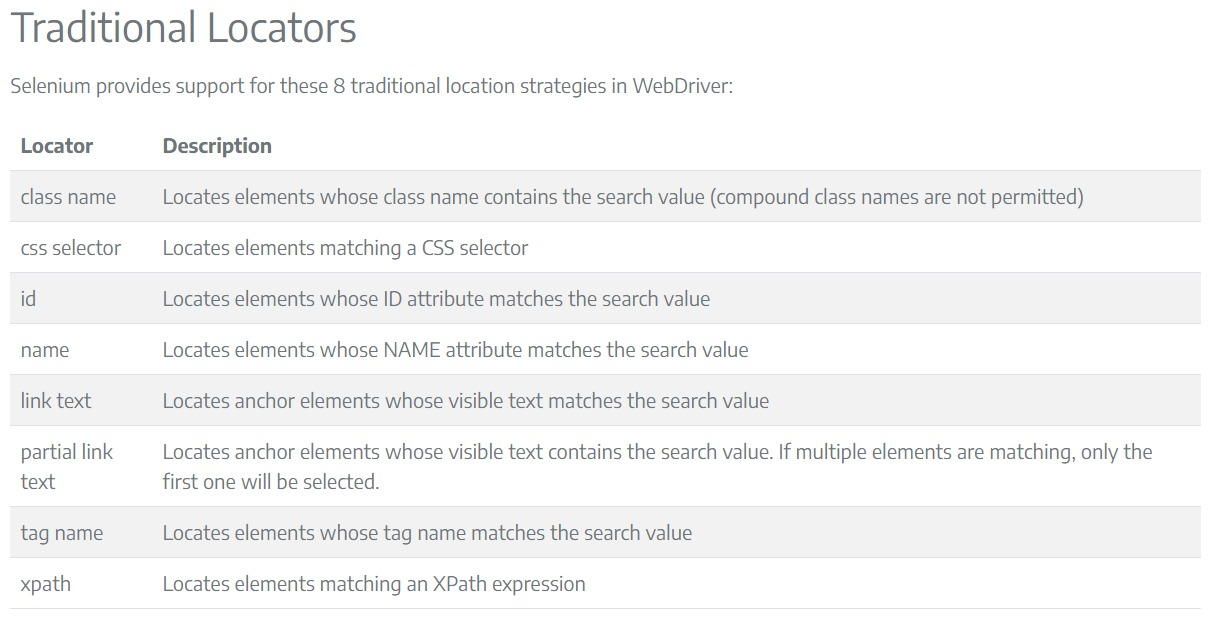

In [3]:
from PIL import Image
from IPython.display import display
img = Image.open('Images/LocatorStrategies.jpg')
display(img)

Study Case

In [ ]:
# Hostear en la web del Cia

"""

<html>
<body>
<style>
.information {
  background-color: white;
  color: black;
  padding: 10px;
}
</style>
<h2>Contact Selenium</h2>

<form action="/action_page.php">
  <input type="radio" name="gender" value="m" />Male &nbsp;
  <input type="radio" name="gender" value="f" />Female <br>
  <br>
  <label for="fname">First name:</label><br>
  <input class="information" type="text" id="fname" name="fname" value="Jane"><br><br>
  <label for="lname">Last name:</label><br>
  <input class="information" type="text" id="lname" name="lname" value="Doe"><br><br>
  <label for="newsletter">Newsletter:</label>
  <input type="checkbox" name="newsletter" value="1" /><br><br>
  <input type="submit" value="Submit">
</form> 

<p>To know more about Selenium, visit the official page 
<a href ="www.selenium.dev">Selenium Official Page</a> 
</p>

</body>
</html>

"""

In [19]:
# Import the necessary libraries
import pytest
import time
from selenium.common import NoSuchElementException, ElementNotInteractableException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium import webdriver

# Start Session
driver = webdriver.Chrome()
driver.get('https://www.selenium.dev/selenium/web/dynamic.html')

# Traditional Locating elements 8 Selenium Samples:
driver.find_element(By.CLASS_NAME, "information")
driver.find_element(By.CSS_SELECTOR, "#fname")
driver.find_element(By.ID, "lname")
driver.find_element(By.NAME, "newsletter")
driver.find_element(By.LINK_TEXT, "Selenium Official Page")
driver.find_element(By.PARTIAL_LINK_TEXT, "Official Page")
driver.find_element(By.TAG_NAME, "a")
driver.find_element(By.XPATH, "//input[@value='f']") # https://www.selenium.dev/documentation/webdriver/elements/locators/#xpath

# Xpath Locator can have an absolute path or a relative path like in the examples below (Read The Docs above)
# Absolute path: /html/body/div[2]/form/input[2]
# Relative path: //input[@value='f']

# Print all the elements located (Finding Web Elements)
print(driver.find_elements(By.CLASS_NAME, "information"))
print(driver.find_elements(By.CSS_SELECTOR, "#fname"))
print(driver.find_elements(By.ID, "lname"))
print(driver.find_elements(By.NAME, "newsletter"))
print(driver.find_elements(By.LINK_TEXT, "Selenium Official Page"))
print(driver.find_elements(By.PARTIAL_LINK_TEXT, "Official Page"))
print(driver.find_elements(By.TAG_NAME, "a"))
print(driver.find_elements(By.XPATH, "//input[@value='f']"))

# Close the browser
time.sleep(6)
driver.quit()


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".information"}
  (Session info: chrome=123.0.6312.107); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF66CAD7032+63090]
	(No symbol) [0x00007FF66CA42C82]
	(No symbol) [0x00007FF66C8DEC65]
	(No symbol) [0x00007FF66C92499D]
	(No symbol) [0x00007FF66C924ADC]
	(No symbol) [0x00007FF66C965B37]
	(No symbol) [0x00007FF66C94701F]
	(No symbol) [0x00007FF66C963412]
	(No symbol) [0x00007FF66C946D83]
	(No symbol) [0x00007FF66C9183A8]
	(No symbol) [0x00007FF66C919441]
	GetHandleVerifier [0x00007FF66CED25AD+4238317]
	GetHandleVerifier [0x00007FF66CF0F70D+4488525]
	GetHandleVerifier [0x00007FF66CF079EF+4456495]
	GetHandleVerifier [0x00007FF66CBB0576+953270]
	(No symbol) [0x00007FF66CA4E54F]
	(No symbol) [0x00007FF66CA49224]
	(No symbol) [0x00007FF66CA4935B]
	(No symbol) [0x00007FF66CA39B94]
	BaseThreadInitThunk [0x00007FFCE30B7344+20]
	RtlUserThreadStart [0x00007FFCE3F026B1+33]


Relative Locators

In [ ]:
# Selenium uses the JavaScript function getBoundingClientRect() https://developer.mozilla.org/en-US/docs/Web/API/Element/getBoundingClientRect 
# to determine the size and position of elements on the page, and can use this information to locate neighboring elements.

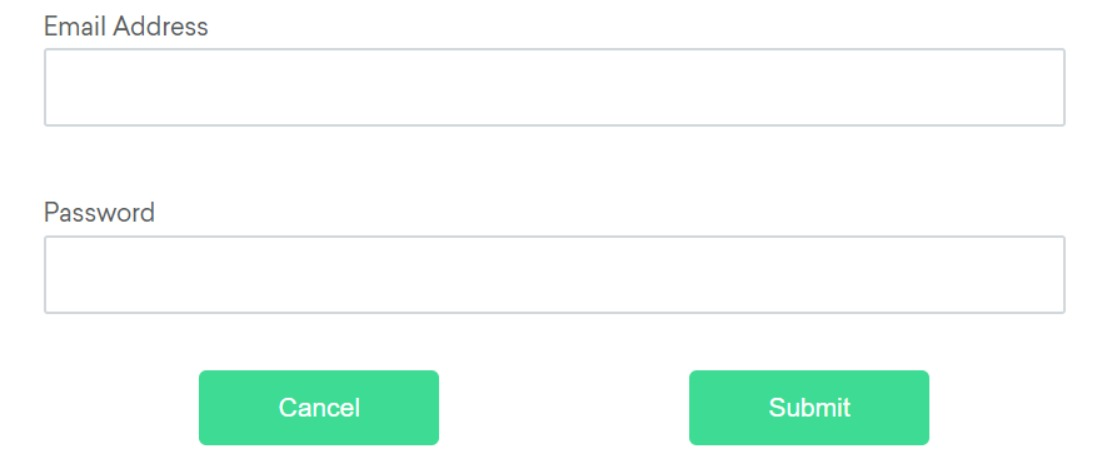

In [2]:
from PIL import Image
from IPython.display import display
img = Image.open('Images/RelativeLocatorUseSample.jpg')
display(img)

In [18]:
# Import the necessary libraries
import pytest
import time
from selenium.common import NoSuchElementException, ElementNotInteractableException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium import webdriver
from selenium.webdriver.support.relative_locator import locate_with

# Start Session
driver = webdriver.Chrome()
driver.get('https://www.selenium.dev/selenium/web/dynamic.html')

# Relative Locating elements 6 Selenium Samples:
email_locator = locate_with(By.TAG_NAME, "input").above({By.ID: "password"})
password_locator = locate_with(By.TAG_NAME, "input").below({By.ID: "email"})
cancel_locator = locate_with(By.TAG_NAME, "button").to_left_of({By.ID: "submit"})
submit_locator = locate_with(By.TAG_NAME, "button").to_right_of({By.ID: "cancel"})
email_locator = locate_with(By.TAG_NAME, "input").near({By.ID: "lbl-email"})

# Print all the relative located elements (Finding Web Elements)
print(driver.find_elements(email_locator))
print(driver.find_elements(password_locator))
print(driver.find_elements(cancel_locator))
print(driver.find_elements(submit_locator))
print(driver.find_elements(email_locator))

# Close the browser
time.sleep(6)
driver.quit()

JavascriptException: Message: javascript error: {"status":7,"value":"No element has been found by {\"id\":\"lbl-email\"}"}
  (Session info: chrome=123.0.6312.107)
Stacktrace:
	GetHandleVerifier [0x00007FF66CAD7032+63090]
	(No symbol) [0x00007FF66CA42C82]
	(No symbol) [0x00007FF66C8DEC65]
	(No symbol) [0x00007FF66C8E3D21]
	(No symbol) [0x00007FF66C8E6462]
	(No symbol) [0x00007FF66C964062]
	(No symbol) [0x00007FF66C946FDA]
	(No symbol) [0x00007FF66C963412]
	(No symbol) [0x00007FF66C946D83]
	(No symbol) [0x00007FF66C9183A8]
	(No symbol) [0x00007FF66C919441]
	GetHandleVerifier [0x00007FF66CED25AD+4238317]
	GetHandleVerifier [0x00007FF66CF0F70D+4488525]
	GetHandleVerifier [0x00007FF66CF079EF+4456495]
	GetHandleVerifier [0x00007FF66CBB0576+953270]
	(No symbol) [0x00007FF66CA4E54F]
	(No symbol) [0x00007FF66CA49224]
	(No symbol) [0x00007FF66CA4935B]
	(No symbol) [0x00007FF66CA39B94]
	BaseThreadInitThunk [0x00007FFCE30B7344+20]
	RtlUserThreadStart [0x00007FFCE3F026B1+33]


Finding Web Elements Deep Approach

In [ ]:
# Many locators will match multiple elements on the page. 
# The singular find element method will return a reference to the first element found within a given context.

# within es dentro xd

In [ ]:
# Hostear en la web del Cia

"""
<ol id="vegetables">
 <li class="potatoes">…
 <li class="onions">…
 <li class="tomatoes"><span>Tomato is a Vegetable</span>…
</ol>
<ul id="fruits">
  <li class="bananas">…
  <li class="apples">…
  <li class="tomatoes"><span>Tomato is a Fruit</span>…
</ul>

"""

In [21]:
# Import the necessary libraries
import pytest
import time
from selenium.common import NoSuchElementException, ElementNotInteractableException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium import webdriver
from selenium.webdriver.support.relative_locator import locate_with

# Start Session
driver = webdriver.Chrome()
driver.get('https://www.selenium.dev/selenium/web/dynamic.html')


# All Finding Web Elements methods


# 1.- Evaluating entire DOM 
# The find element returns a reference to the first element in the DOM that matches with the provided locator.
# In our example HTML above, there are two elements that have a class name of “tomatoes” so this method 
# will return the element in the “vegetables” list.
vegetable = driver.find_element(By.CLASS_NAME, "tomatoes")
print(vegetable.text)

# 2.- Evaluating a subset of the DOM 
# In the above example there are two elements with a class name of “tomatoes” and it is
#  a little more challenging to get the reference for the second one.
fruits = driver.find_element(By.ID, "fruits")
fruit = fruits.find_element(By.CLASS_NAME,"tomatoes")
#print(fruits.text)
print(fruit.text)

# 3.- Optimized locator 
# A nested lookup might not be the most effective location strategy since it requires two separate commands to be issued to the browser.
# To improve the performance slightly, we can use either CSS or XPath to find this element in a single command.
fruit = driver.find_element(By.CSS_SELECTOR,"#fruits .tomatoes")
print(fruit.text)

# 4.- All matching elements
# There are several use cases for needing to get references to all elements that match a locator, rather than just the first one
# The plural find elements methods return a collection of element references. If there are no matches, an empty list is returned.
plants = driver.find_elements(By.TAG_NAME, "li")
print(plants)


MaxRetryError: HTTPConnectionPool(host='localhost', port=52270): Max retries exceeded with url: /session/04e045df7b5f43d28333ce659297c290/element (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002A1C44A1090>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [14]:
# Import the necessary libraries
import pytest
import time
from selenium.common import NoSuchElementException, ElementNotInteractableException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium import webdriver
from selenium.webdriver.support.relative_locator import locate_with

# After you have the collection of elements with the 4 method, you can iterate over them to access the individual elements.

# Start Session
driver = webdriver.Chrome()
driver.get("https://www.ulima.edu.pe/")

# Get all the elements available with tag name 'p'
elements = driver.find_elements(By.TAG_NAME, 'p')

# Iterate over the elements and print the text
for e in elements:
    print(e.text)

# Close the browser
driver.quit()


En las últimas décadas, se ha producido un gran avance en la neurociencia para comprender cómo funciona nuestro cerebro, pero ¿podría este desarrollo ser también una...
En recompensa a la dedicación y el esfuerzo puesto en sus estudios, la Universidad de Lima otorgó becas de oficio a los alumnos que ocuparon los primeros puestos en cada una...
Solo por diversión, Ignacio Schwalb comenzó a hacer cerveza con sus amigos Diego Rodríguez y Juan Diego Vásquez en su propia casa. Cuando a otras personas que la

El Centro de Sostenibilidad de la Universidad de Lima (Responde Ulima), junto a la Municipalidad Metropolitana de Lima y el Servicio de Parques de Lima, realizará,

Redes Sociales
Avenida Javier Prado Este 4600
Urbanización Fundo Monterrico Chico
Distrito de Santiago de Surco 
Provincia y departamento de Lima
Código postal 15023
Teléfono (511) 4376767
© Universidad de Lima, 2024
Todos los derechos reservados


Take Actions on Elements

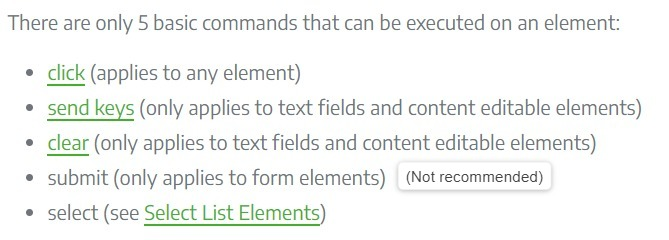

In [22]:
from PIL import Image
from IPython.display import display
img = Image.open('Images/Actions.jpg')
display(img)

Request Elements Information

In [24]:
# Import the necessary libraries
import pytest
import time
from selenium.common import NoSuchElementException, ElementNotInteractableException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium import webdriver
from selenium.webdriver.support.relative_locator import locate_with

# Start Session
driver = webdriver.Chrome()
# Navigate to the url
driver.get("https://www.selenium.dev/selenium/web/inputs.html")

# Is Displayed
# Get boolean value for is element display
is_email_visible = driver.find_element(By.NAME, "email_input").is_displayed()

# Is Enabled
# Returns true if element is enabled else returns false
value = driver.find_element(By.NAME, 'button_input').is_enabled()

# Is Selected
# Returns true if element is checked else returns false
checkbox = driver.find_element(By.NAME, "checkbox_input").is_selected()

# Tag Name
# Returns TagName of the element
attr = driver.find_element(By.NAME, "email_input").tag_name

# Size and Position 
# Returns height, width, x and y coordinates referenced element
res = driver.find_element(By.NAME, "range_input").rect

# Fetching Attributes or Properties
# Identify the email text box
email_txt = driver.find_element(By.NAME, "email_input")

# Fetch the value property associated with the textbox
value_info = email_txt.get_attribute("value")

# Print all the values
print(is_email_visible)
print(value)
print(checkbox)
print(attr)
print(res)
print(value_info)


# Close the browser
driver.quit()

True
True
True
input
{'height': 16, 'width': 129, 'x': 10, 'y': 129.83750915527344}
admin@localhost


In [25]:
# Import the necessary libraries
import pytest
import time
from selenium.common import NoSuchElementException, ElementNotInteractableException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium import webdriver
from selenium.webdriver.support.relative_locator import locate_with

# Start Session
driver = webdriver.Chrome()
# Navigate to the url
driver.get('https://www.selenium.dev/selenium/web/colorPage.html')

# Get Css Value    
# Retrieves the computed style property 'color' of linktext
cssValue = driver.find_element(By.ID, "namedColor").value_of_css_property('background-color')
print(cssValue)

# Close the browser
driver.quit()


rgba(0, 128, 0, 1)


In [27]:
# Import the necessary libraries
import pytest
import time
from selenium.common import NoSuchElementException, ElementNotInteractableException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium import webdriver
from selenium.webdriver.support.relative_locator import locate_with

# Start Session
driver = webdriver.Chrome()
# Navigate to the url
driver.get('https://www.selenium.dev/selenium/web/linked_image.html')

# Text Content
# Retrieves the text of the element
text = driver.find_element(By.ID, "justanotherLink").text
print(text)

# Close the browser
driver.quit()

Just another link.
